#### Student Name: Alan Gewerc
#### Student ID: 29961246
#### Student email: agew0001@student.monash.edu




<br><br>
# Part B. Neural Network vs. Perceptron

In this part, you apply a 3-layer Neural Network on a synthetically generated data to compare its performance with Perceptron. Here, we are looking for your explanation about the differences between perceptron and NN that leads to different results.

I. Load Task2B_train.csv and Task2B_test.csv sets, plot the training data with classes are marked with different colors, and attach the plot to your PDF report.

#### Import Libraries

In [1]:
library(ggplot2) # make beautiful plots

#### Import Train and Test data

In [2]:
list <- structure(NA,class="result")
"[<-.result" <- function(x,...,value) {
  args <- as.list(match.call())
  args <- args[-c(1:2,length(args))]
  length(value) <- length(args)
  for(i in seq(along=args)) {
    a <- args[[i]]
    if(!missing(a)) eval.parent(substitute(a <- v,list(a=a,v=value[[i]])))
  }
  x
}

# reading the data
read.data <- function(file.name, scaling=FALSE) {
  data <- read.csv(file=file.name,head=TRUE,sep=",")
  data <- data[complete.cases(data),] # removes rows with NA values
  D <- ncol(data)
  x = data[,-D]
  y = data[,D]
  if (isTRUE(scaling)) {
    x = scale(x)
    y = scale(y)
  }
  return (list('x' = x, 'y' = y))
}

In [3]:
# Read the datasets
set.seed(1234)          # set random seed
library(ggplot2)        # load libraries
list[X1,T1] <- read.data('data/Sintetic2B_train.csv') # read training data
T1[T1==0] <- -1         # convert 0 labels to -1 
list[X2,T2] <- read.data('data/Sintetic2B_test.csv') # read test data
T2[T2==0] <- -1         # convert 0 labels to -1 

#### Plot the Trainning Data

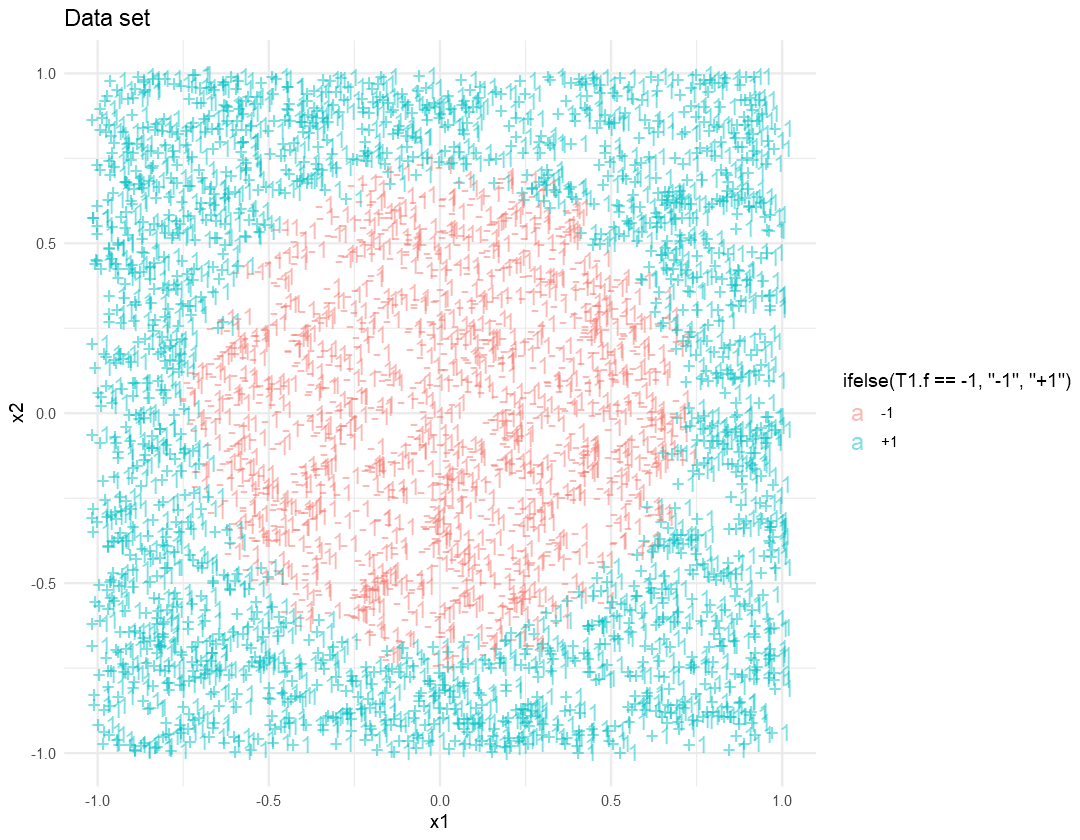

In [4]:
options(repr.plot.width = 9, repr.plot.height = 7) # Define plot size
options(warn = -1) # don't show warning


T1.f <- as.factor(T1) # change to categorical data for plotting

ggplot(data=X1, aes(x=x1, y=x2, color=ifelse(T1.f==-1,'-1','+1'), label = ifelse(T1.f==-1,'-1','+1'))) + 
geom_text(size = 5, alpha = 0.5) + ggtitle ('Data set') + theme_minimal()

    II. Train two perceptron models on the loaded training data by setting the learning rates η to .01 and .09 respectively, using a code from Activity 3.1. Calculate the test errors of two models and find the best η and its corresponding model, then plot the test data while the points are colored with their estimated class labels using the best model that you have selected; attach the plot to your PDF report.Hint: Note that you must remove NA records from the datasets (using `complete.cases()` function). You may also choose to change the labels from [0, 1] to [-1, +1] for your convenience. If you decided to use the code from Activity 3.1, you may need to change some initial settings (e.g., epsilon and tau.max). Finally, remember 3 that perceptron is sensitive to initial weights. Therefore, we recommend to run your code a few times with different initial weights.

# The Perceptron
## Steps for Building Perceptron
Assuming the class labels are $+1$ and $-1$, we take the following steps to build a perceptron:

 1- Choose and implement a basis function $\pmb{\phi}$, and initialize weight vector $\pmb{w}$, learning rate $\eta$ and stopping threshold $\epsilon$,

 2- Use the above function and repeat the following until the improvement is superficial (i.e., $|E(\pmb{w}^{(\tau+1)})-E(\pmb{w}^{(\tau)})| < \epsilon$):

* Shuffle the training data

* For each datapoint in the training data do:

 + Classify the sample using the current weight vector,

 + If the sample correctly classified, pick the next point (continue the loop)

 + If the sample misclassified, update the weight vector as $\pmb{w}^{\tau+1} := \pmb{w}^{\tau} + \eta\phi(\pmb{x}_n) t_n$

Seems easy! Let's do it step by step!

The following implements a simple linear basis fucntion. This is basically an identity function plus $1$ (the intercept will multiplied to this $1$)

In [5]:
## Basis function (Step 1)
Phi <- as.matrix(cbind(1, X1)) # add a column of 1 as phi_0
train.len <- nrow(X1)

Before going further, let's set the parameters. We also need to create some empty matrices for future uses.

## eta = 0.01

In [6]:
# Initialization
eta <- 0.01 # Learning rate
epsilon <- 0.001 # Stoping criterion
tau.max <- 100000 # Maximum number of iterations

W01 <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
W01[1,] <- c(0.1, 0.4, 0.1) # Random initial values for weight vector

error.trace <- matrix(0,nrow=tau.max, ncol=1) # Placeholder for errors
error.trace[1] <- sum((Phi%*%W01[1,])*T<0)/train.len*100 # record error for initial weights

tau <- 1 # iteration counter 
terminate <- FALSE # termination status

The following is the main loop where we learn the model paramters using SGD.

In [7]:
# Main Loop (Step 2):
while(!terminate){
    # resuffling train data and associated labels:
    train.index <- sample(1:train.len, replace = FALSE)
    Phi <- Phi[train.index,]
    T <- T1[train.index]

    for (i in 1:train.len){
        if (tau == tau.max) {break}
              
        # look for missclassified samples
        if ((W01[tau,]%*%Phi[i,])*T[i]<0){
            
            # update tau counter
            tau <- tau +1
            
            # update the weights
            W01[tau,] <- W01[tau-1,] + eta * Phi[i,] * T[i]
            
            # update the records
            error.trace[tau] <- sum((Phi%*%W01[tau,])*T<0)/train.len*100
        } 
        
    }
    
    # decrease eta:
    eta = eta * 0.99
    # recalculate termination conditions
    terminate <- tau >= tau.max | 
        abs(sum((Phi%*%W01[tau,])*T<0)/train.len - sum((Phi%*%W01[tau-1,])*T<0)/train.len) <= epsilon 
    
}
W01 <- W01[1:tau,] # cut the empty part of the matrix (when the loop stops before tau == tau.max)

Done! Let's print the learnt weight vector.

In [8]:
## the  final result is w:
w01 <- W01[tau,]
## report
cat('\n\nThe  final weight vector:', w01)



The  final weight vector: 0.00523888 0.003453625 -0.003679374

In [9]:
test.len <- nrow(X2)
Phi.test <- as.matrix(cbind(1, X2)) # add a column of 1 as phi_0
sum((Phi.test%*%w01)*T1<0)/test.len*100 # testing error

[1] 40.2

### eta = 0.09

In [10]:
# Initialization
eta <- 0.09 # Learning rate
epsilon <- 0.001 # Stoping criterion
tau.max <- 10000 # Maximum number of iterations

W09 <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
W09[1,] <- c(0.1, 0.4, 0.1) # Random initial values for weight vector

error.trace <- matrix(0,nrow=tau.max, ncol=1) # Placeholder for errors
error.trace[1] <- sum((Phi%*%W09[1,])*T<0)/train.len*100 # record error for initial weights

tau <- 1 # iteration counter 
terminate <- FALSE # termination status

In [11]:
# Main Loop (Step 2):
while(!terminate){
    # resuffling train data and associated labels:
    train.index <- sample(1:train.len, replace = FALSE)
    Phi <- Phi[train.index,]
    T <- T1[train.index]

    for (i in 1:train.len){
        if (tau == tau.max) {break}
              
        # look for missclassified samples
        if ((W09[tau,]%*%Phi[i,])*T[i]<0){
            
            # update tau counter
            tau <- tau +1
            
            # update the weights
            W09[tau,] <- W09[tau-1,] + eta * Phi[i,] * T[i]
            
            # update the records
            error.trace[tau] <- sum((Phi%*%W09[tau,])*T<0)/train.len*100
        } 
        
    }
    
    # decrease eta:
    eta = eta * 0.99
    # recalculate termination conditions
    terminate <- tau >= tau.max | 
        abs(sum((Phi%*%W09[tau,])*T<0)/train.len - sum((Phi%*%W09[tau-1,])*T<0)/train.len) <= epsilon 
    
}
W09 <- W09[1:tau,] # cut the empty part of the matrix (when the loop stops before tau == tau.max)

Done! Let's print the learnt weight vector.

In [12]:
## the  final result is w:
w09 <- W09[tau,]
## report
cat('\n\nThe  final weight vector:', w09)



The  final weight vector: 0.01000926 -0.05552552 0.108295

In [13]:
sum((Phi.test%*%w09)*T2<0)/test.len*100 # testing error

[1] 50.04

# Plot Errors 

The testing error for eta 0.01 is 40.2. 

The testing error for eta 0.09 is 50.04.

So, we pick eta 0.01

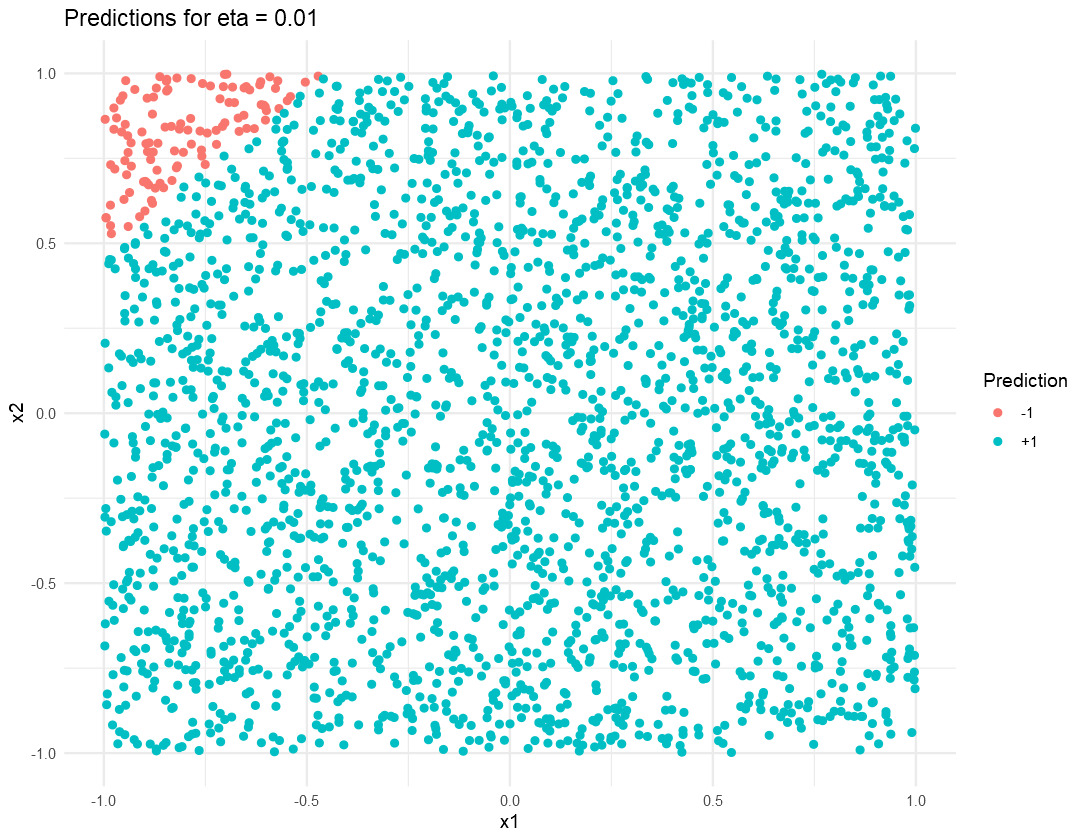

In [14]:
# Visualizations (the testing error of eta 0.01 is 43.64 and for eta 0.09 is 50.24, so we pick eta 0.01)
## Ploting the decision boundary
ggplot(data=as.data.frame(Phi), aes(x=x1, y=x2, color = factor(ifelse(Phi%*%w01>0, '+1', '-1')))) +
    geom_point() +
    scale_color_discrete(guide = guide_legend(title = 'Prediction'))+
    ggtitle('Predictions for eta = 0.01') +
    theme_minimal()

III. For each combination of K (i.e, number of units in the hidden layer) in {5, 10, 15, …, 100} and μ (learning rate) in {0.01, 0.09}, run the 3-layer Neural Network given to you in Activity 5.1 and record testing error for each of them (40 models will be developed, based on all possible combinations). Plot the error for μ 0.01 and 0.09 vs K (one line for μ 0.01 and another line for μ 0.09 in a plot) and attach it to your PDF report. Based on this plot, find the best combination of K and μ and the corresponding model, then plot the test data while the points are colored with their estimated class labels using the best model that you have selected; attach the plot to your PDF report.
Hint: In case you choose to use the provided examples in Activity 5.1, you may need to transpose the dataset (using “t()” function) and use different values for parameter settings (e.g., lambda).


# Neural Network

#### GENERAL AUXILIARY FUNCTIONS

In [15]:
list <- structure(NA,class="result")
"[<-.result" <- function(x,...,value) {
  args <- as.list(match.call())
  args <- args[-c(1:2,length(args))]
  length(value) <- length(args)
  for(i in seq(along=args)) {
    a <- args[[i]]
    if(!missing(a)) eval.parent(substitute(a <- v,list(a=a,v=value[[i]])))
  }
  x
}

In [16]:
## the activation function (tanh here)
h <- function(z) { 
  return ((exp(z)-exp(-z))/(exp(z)+exp(-z)))
}

In [17]:
## the derivitive of the activation function (tanh here)
h.d <- function(z) {
return (1-(h(z))^2)
}

In [18]:
## Class Probabilities
class.prob <- function(X, W1, W2, b1, b2){
  a2 <- h(sweep(W1 %*% X, 1, b1,'+' ))
  a3 <- h(sweep(W2 %*% a2, 1, b2,'+' ))
  return (a3)
}

In [19]:
## prediction
nn.predict <- function(X, W1, W2, b1, b2, threshold=0){
  return (ifelse(class.prob(X, W1, W2, b1, b2)>=threshold, 1, -1))
}

In [20]:
## feedforward step
feedforward <- function(Xi, Ti, W1, b1, W2, b2){
  ### 1st (input) layer 
  a1 <- Xi
  y <- Ti
  ### 2nd (hidden) layer
  z2 <- W1 %*% a1 + b1
  a2 <- h(z2)        
  ### 3rd (output) layer
  z3 <- W2 %*% a2 + b2
  a3 <- h(z3)  
  return(list(a1, a2, a3, y, z2, z3))
}

In [21]:
## backpropagation step
backpropagation <- function(Ti, W2, z2, z3, a3){
  ### 3rd (output) layer
  d3 <- -(Ti-a3) * h.d(z3)
  ### 2nd (hidden) layer
  d2 <-  t(W2)%*%d3  * h.d (z2)
  return(list(d2,d3))
}

In [22]:
error.rate <- function(Y1, T1){
  if (length(Y1)!=length(T1)){
    stop('error.rate: size of true lables and predicted labels mismatch')
  }
  return (sum(T1!=Y1)/length(T1))
}

#### NN build function

In [23]:
nn.build <- function(K, X1, T1, plotting=FALSE, epoch.max=50, eta = 0.1, lambda = 0.01){
  # initialization
  if (plotting) {error.rec <- matrix(NA,nrow=epoch.max, ncol=1)}
  D <- nrow(X1)
  if (D!=2) {stop('nn.predict: This simple version only accepts two dimensional data.')}
  N <- ncol(X1)

  W1 <- matrix(rnorm(D*K, sd=0.5), nrow=K, ncol=D)
  b1 <- matrix(rnorm(1*K), nrow=K, ncol=1)
  W2 <- matrix(rnorm(K*1, sd=0.5), nrow=1, ncol=K)
  b2 <- matrix(rnorm(1*1), nrow=1, ncol=1)

  for (epoch in 1:epoch.max){   
    ## delta vectors/matrices initialization
    W1.d <- W1 *0
    b1.d <- b1 *0
    W2.d <- W2 *0
    b2.d <- b2 *0

    for (i in 1:N){
      ## Feedforward:
      list[a1, a2, a3, y, z2, z3] <- feedforward(X1[,i], T1[i], W1, b1, W2, b2)          
      ## Backpropagation:
      list[d2, d3] <- backpropagation(T1[i], W2, z2, z3, a3)
      ## calculate the delta values
      ### 1st layer
      W1.d <- W1.d + d2 %*% t(a1)
      b1.d <- b1.d + d2
      ### 2nd layer
      W2.d <- W2.d + d3 %*% t(a2)
      b2.d <- b2.d + d3
    }
    ## update weight vectors and matrices
    W1 <- W1 - eta * (W1.d/N + lambda*W1)
    b1 <- b1 - eta * (b1.d/N)
    W2 <- W2 - eta * (W2.d/N + lambda*W2)
    b2 <- b2 - eta * (b2.d/N)
    ## record the errors
    if (plotting){error.rec[epoch]<- error.rate(nn.predict(X1, W1, W2, b1, b2), T1)
                   plot(error.rec, xlab = 'epoch', ylab = 'error', main = 'Neural Net')
}
  }
  return(list(W1, W2, b1, b2))
}

    For each combination of K (i.e, number of units in the hidden layer) in {5, 10, 15, …, 100} and μ (learning rate) in {0.01, 0.09}, run the 3-layer Neural Network given to you in Activity 5.1 and record testing error for each of them (40 models will be developed, based on all possible combinations). 

In [24]:
## convert data and labels to matrices
X1.t <- t(as.matrix(X1))
X2.t <- t(as.matrix(X2))

In [25]:
# create dataframe to receive errors
test.error.nn <- data.frame(matrix(nrow = 40, ncol =3, dimnames = list(NULL,c("Eta", "K", "Test Error"))))
i = 1
# Build a number of Neural Networks with different number of units in the hidden layer
for (k in seq(5, 100, 5)) {
    for(eta in c(0.01, 0.09)){
  parameters <- nn.build(k, X1.t, T1, plotting=FALSE, epoch.max=500, eta = eta, lambda = 0.0001)
  # Evaluate the model
  test.prediction <- nn.predict(X2.t, parameters[[1]], parameters[[2]], parameters[[3]], parameters[[4]])
  test.error <- error.rate(test.prediction, T2)
  # Record the test errors for plotting purposes
  test.error.nn[i,] <- c(eta, k, test.error)
  i = i+1
}}

    Plot the error for μ 0.01 and 0.09 vs K (one line for μ 0.01 and another line for μ 0.09 in a plot) and attach it to your PDF report. 

In [37]:
test.error.nn[,"Eta"] <- as.factor(test.error.nn[,"Eta"])

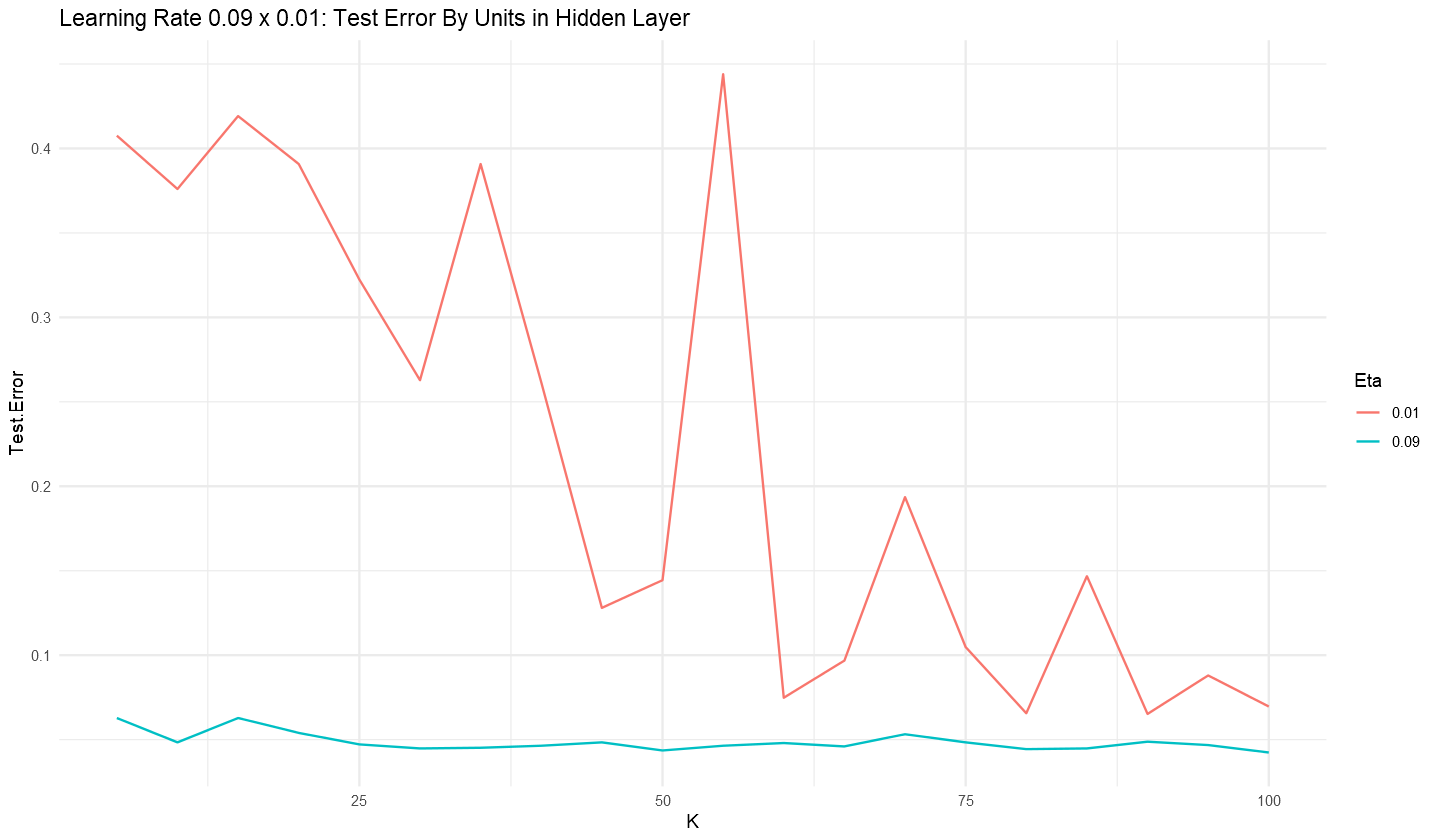

In [40]:
options(repr.plot.width = 12, repr.plot.height = 7) # Define plot size
ggplot(data = test.error.nn, aes(K, Test.Error, color = Eta)) + geom_line() + 
            ggtitle("Learning Rate 0.09 x 0.01: Test Error By Units in Hidden Layer") + theme_minimal()

    Based on this plot, find the best combination of K and μ and the corresponding model, then plot the test data while the points are colored with their estimated class labels using the best model that you have selected; attach the plot to your PDF report.

In [28]:
top.prediction <- test.error.nn[test.error.nn$Test.Error == min(test.error.nn$Test.Error),]
top.prediction

,Eta,K,Test.Error
,<dbl>,<dbl>,<dbl>
40,0.09,100,0.0424


In [29]:
ifelse(test.prediction==-1,'-1','+1')

1,2,3,4,5,6,7,8,9,10,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
+1,-1,-1,+1,+1,+1,+1,+1,+1,-1,...,+1,+1,-1,+1,+1,+1,-1,+1,-1,-1


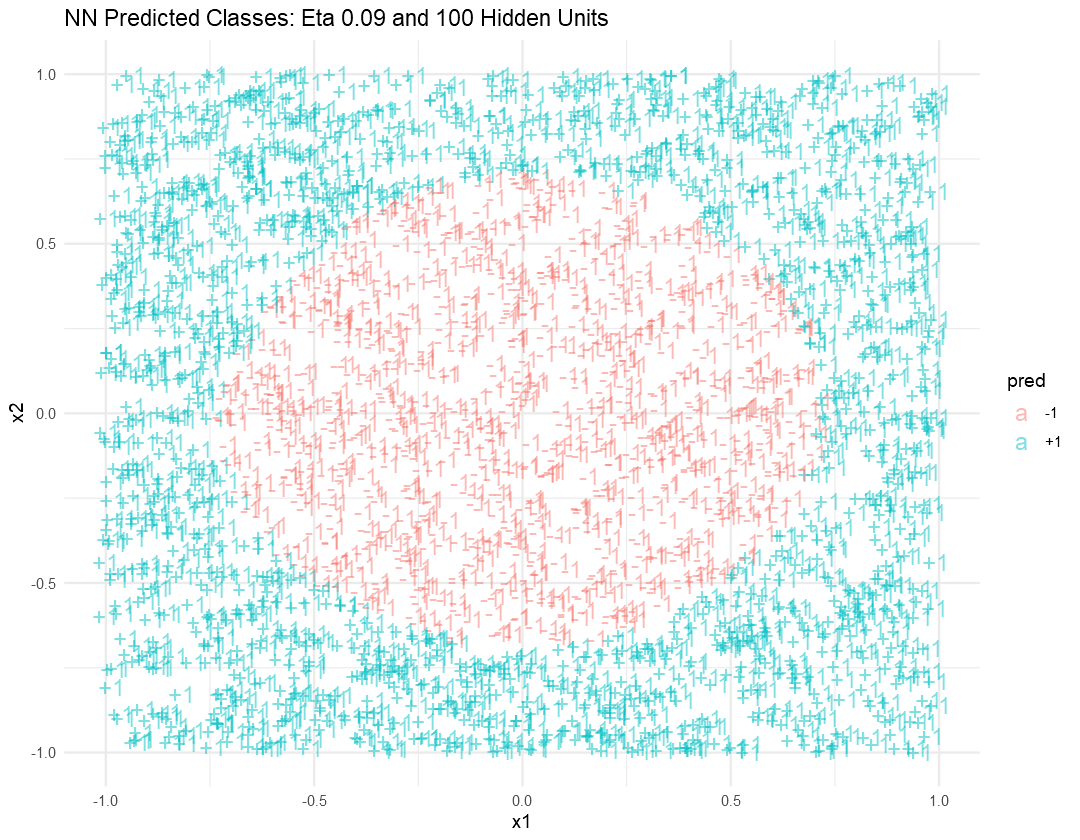

In [41]:
# retrieving predictions given best parameters
parameters <- nn.build(K = 100, X1.t, T1, epoch.max=500, eta = 0.09, lambda = 0.0001)
test.prediction <- nn.predict(X2.t, parameters[[1]], parameters[[2]], parameters[[3]], parameters[[4]])
X2$pred <- c(ifelse(test.prediction==-1,'-1','+1'))
# ploting
options(repr.plot.width = 9, repr.plot.height = 7) # Define plot size
ggplot(data=X2, aes(x=x1, y=x2, color = pred, label= pred)) + 
                    geom_text(size = 5, alpha = 0.5) +
                    ggtitle ('NN Predicted Classes: Eta 0.09 and 100 Hidden Units') + theme_minimal()

    IV. In your PDF report, explain the reason(s) responsible for such difference between perceptron and a 3-layer NN by comparing the plots you generated in Steps II and III.
    Hint: Look at the plots and think about the model assumptions.

**Taking the plots from this assessment as example, we can observe with clarity the difference between a classification with a 3-layer NN and perceptron when trying to model a non-linear, more complex relationship between predictors and target in the data. While the Neural Network is able to capture with perfection the relationship, the perceptron does not even converge. 
Neural Networks are multi-stage processing architectures, in which multiple perceptrons may be observed. This is why Neural Network is also known multilayer perceptron (MLP). Due to the robustness of its architecture, Neural Networks are able to capture non-linear relations, which are not possible for single perceptrons. An important factor that allows the Neural Network to model non-linearity is the that uses continuous nonlinearities in the hidden units. In other words, at every layer of the network there is an activation functions such as `sigmoid` or `tanh` (in our case here, `tanh`) that is able to model the non linear relationship. On the other hand, perceptrons use modified step functions that return a binary results.**